In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sn

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_mat, x_test_mat = x_train / 255.0, x_test / 255.0

print( "x_train_mat.shape")
print( x_train_mat.shape )
x_train_vec = x_train_mat.reshape( (-1, 28*28) )
print( "x_train_vec.shape")
print( x_train_vec.shape )

print( "x_test_mat.shape")
print( x_test_mat.shape )
x_test_vec = x_test_mat.reshape( (-1, 28*28) )
print( "x_test_vec.shape")
print( x_test_vec.shape )

print( "y_train.shape")
print( y_train.shape )

print( "y_test.shape")
print( y_test.shape )

x_train_mat.shape
(60000, 28, 28)
x_train_vec.shape
(60000, 784)
x_test_mat.shape
(10000, 28, 28)
x_test_vec.shape
(10000, 784)
y_train.shape
(60000,)
y_test.shape
(10000,)


# Modelos com encoded de dimensão 2

## Modelo 1: simples, poucas camadas e poucos neurônios

In [18]:

model1 = tf.keras.models.Sequential([ 

  tf.keras.layers.Dense(10, activation='relu'),
     

  tf.keras.layers.Dense(2, activation='relu'),  # encoder


  tf.keras.layers.Dense(10, activation='relu'),  
         
  tf.keras.layers.Dense(28*28, activation='sigmoid') # decoder
])


In [19]:

# compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=["accuracy"])

# fit the model on training data
history1 = model1.fit(x_train_vec, x_train_vec, epochs=200, batch_size= 150, validation_split = 1/6)



Epoch 1/200
200/200 [==============================] - 4s 16ms/step - loss: 0.3769 - accuracy: 0.0074 - val_loss: 0.2661 - val_accuracy: 0.0068
Epoch 2/200
200/200 [==============================] - 3s 16ms/step - loss: 0.2565 - accuracy: 0.0078 - val_loss: 0.2470 - val_accuracy: 0.0195
Epoch 3/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2446 - accuracy: 0.0151 - val_loss: 0.2393 - val_accuracy: 0.0170
Epoch 4/200
200/200 [==============================] - 3s 13ms/step - loss: 0.2393 - accuracy: 0.0132 - val_loss: 0.2354 - val_accuracy: 0.0136
Epoch 5/200
200/200 [==============================] - 3s 13ms/step - loss: 0.2363 - accuracy: 0.0116 - val_loss: 0.2329 - val_accuracy: 0.0089
Epoch 6/200
200/200 [==============================] - 3s 13ms/step - loss: 0.2340 - accuracy: 0.0128 - val_loss: 0.2310 - val_accuracy: 0.0151
Epoch 7/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2322 - accuracy: 0.0144 - val_loss: 0.2294 - val_accuracy:

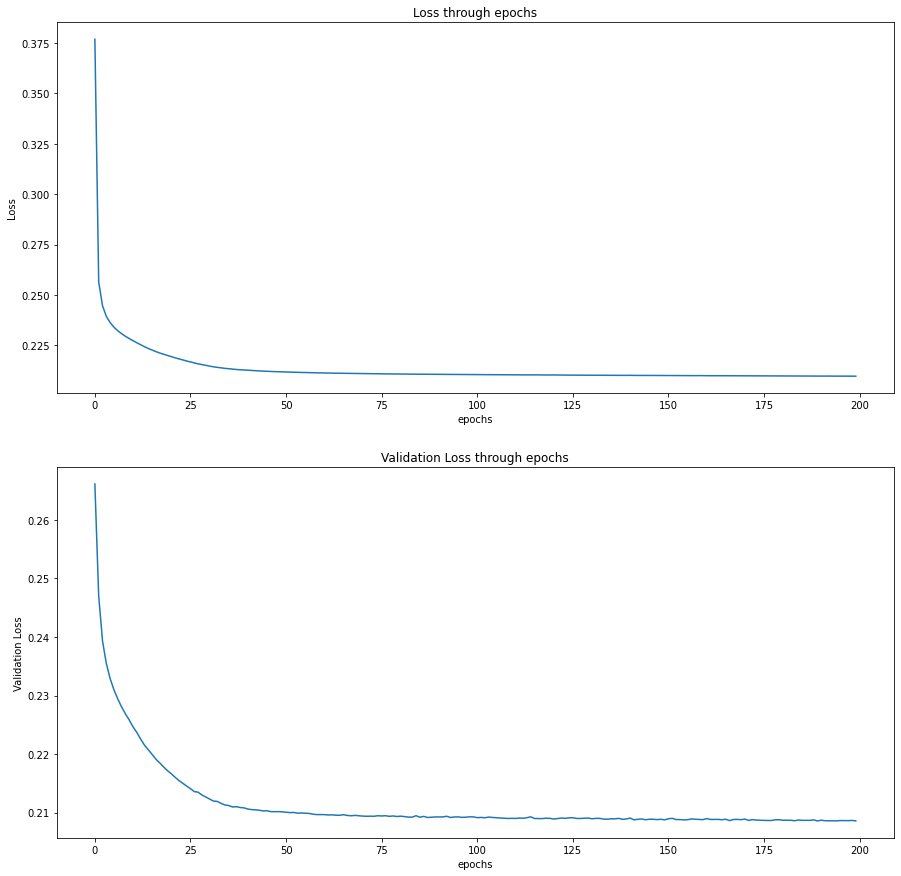

In [21]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

data = ['loss', 'val_loss']
titles = ['Loss through epochs', 'Validation Loss through epochs']
ylabels = ['Loss', 'Validation Loss']

for i in range(2):
  axs[i].plot(history1.history[data[i]])
  axs[i].set_title(titles[i])
  axs[i].set_xlabel('epochs')
  axs[i].set_ylabel(ylabels[i])

plt.show()

In [22]:

# get a summary information about the model 
model1.summary()

# reconstruct the test images
decoded_images1 = model1.predict(x_test_vec)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (250, 10)                 7850      
                                                                 
 dense_9 (Dense)             (250, 2)                  22        
                                                                 
 dense_10 (Dense)            (250, 10)                 30        
                                                                 
 dense_11 (Dense)            (250, 784)                8624      
                                                                 
Total params: 16,526
Trainable params: 16,526
Non-trainable params: 0
_________________________________________________________________


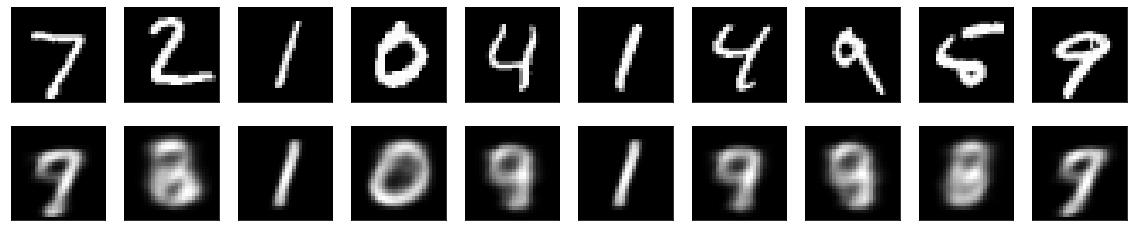

In [23]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Modelo 2: aumentando as camadas e mantendo a quantidade de neurônios

In [24]:

model2 = tf.keras.models.Sequential([

  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
     

  tf.keras.layers.Dense(2, activation='relu'),  # encoder

  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),  
         
  tf.keras.layers.Dense(28*28, activation='sigmoid') # decoder
])


In [25]:

# compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy')

# fit the model on training data
history2 = model2.fit(x_train_vec, x_train_vec, epochs=200, batch_size= 150, validation_split = 1/6)



Epoch 1/200
200/200 [==============================] - 3s 11ms/step - loss: 0.3540 - val_loss: 0.2611
Epoch 2/200
200/200 [==============================] - 2s 10ms/step - loss: 0.2588 - val_loss: 0.2525
Epoch 3/200
200/200 [==============================] - 2s 10ms/step - loss: 0.2486 - val_loss: 0.2415
Epoch 4/200
200/200 [==============================] - 2s 11ms/step - loss: 0.2394 - val_loss: 0.2359
Epoch 5/200
200/200 [==============================] - 2s 11ms/step - loss: 0.2360 - val_loss: 0.2338
Epoch 6/200
200/200 [==============================] - 2s 10ms/step - loss: 0.2344 - val_loss: 0.2323
Epoch 7/200
200/200 [==============================] - 2s 10ms/step - loss: 0.2332 - val_loss: 0.2312
Epoch 8/200
200/200 [==============================] - 2s 10ms/step - loss: 0.2322 - val_loss: 0.2304
Epoch 9/200
200/200 [==============================] - 2s 10ms/step - loss: 0.2314 - val_loss: 0.2295
Epoch 10/200
200/200 [==============================] - 2s 10ms/step - loss: 0.230

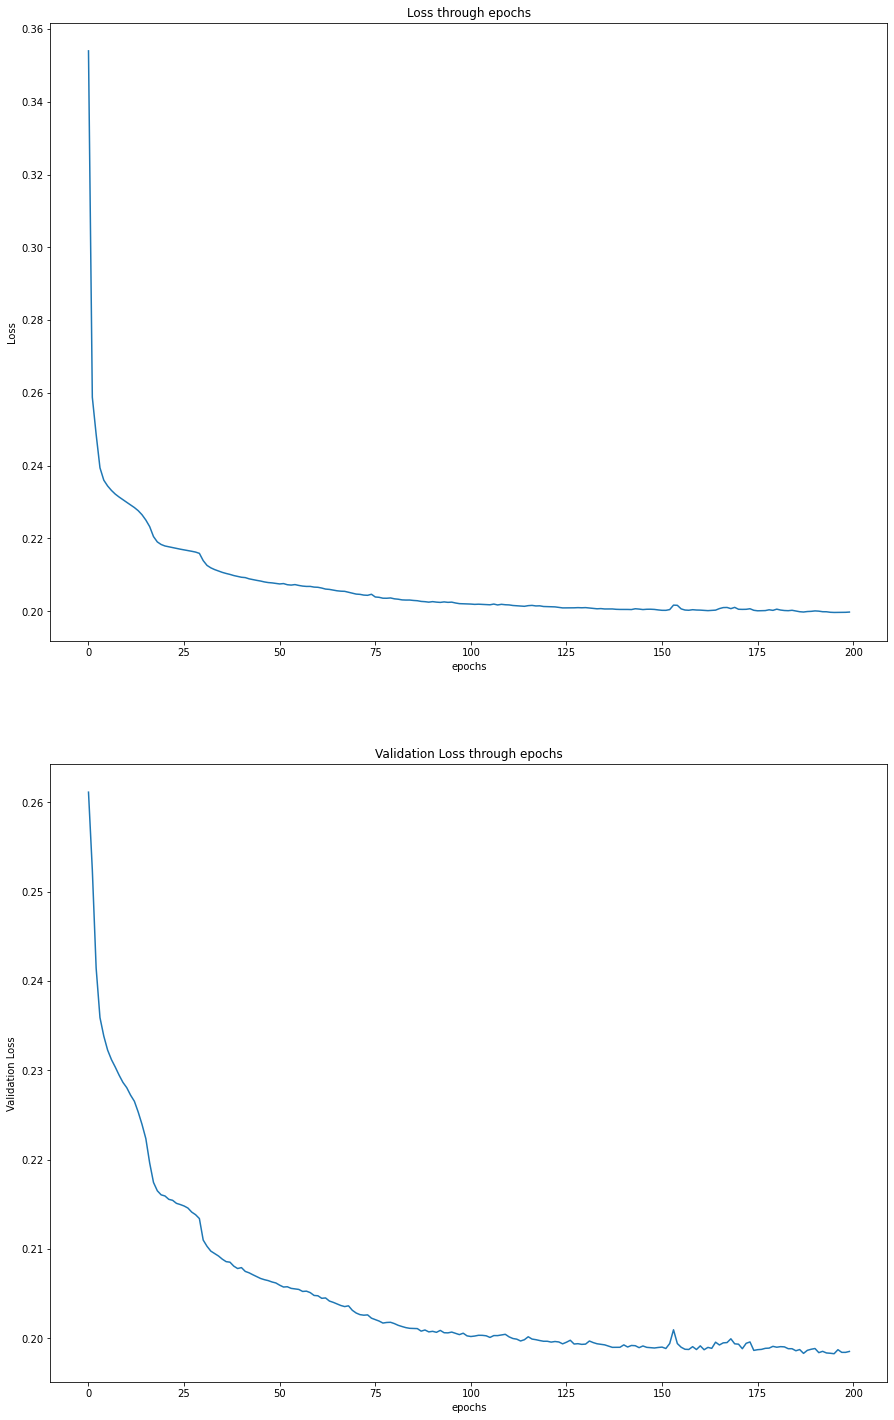

In [27]:
fig, axs = plt.subplots(2,1, figsize=(15,25))

data = ['loss', 'val_loss']
titles = ['Loss through epochs', 'Validation Loss through epochs']

ylabels = ['Loss', 'Validation Loss']

for i in range(2):
  axs[i].plot(history2.history[data[i]])
  axs[i].set_title(titles[i])
  axs[i].set_xlabel('epochs')
  axs[i].set_ylabel(ylabels[i])

plt.show()

In [28]:

# get a summary information about the model 
model2.summary()

# reconstruct the test images
decoded_images2 = model2.predict(x_test_vec)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (250, 10)                 7850      
                                                                 
 dense_13 (Dense)            (250, 10)                 110       
                                                                 
 dense_14 (Dense)            (250, 10)                 110       
                                                                 
 dense_15 (Dense)            (250, 2)                  22        
                                                                 
 dense_16 (Dense)            (250, 10)                 30        
                                                                 
 dense_17 (Dense)            (250, 10)                 110       
                                                                 
 dense_18 (Dense)            (250, 10)                

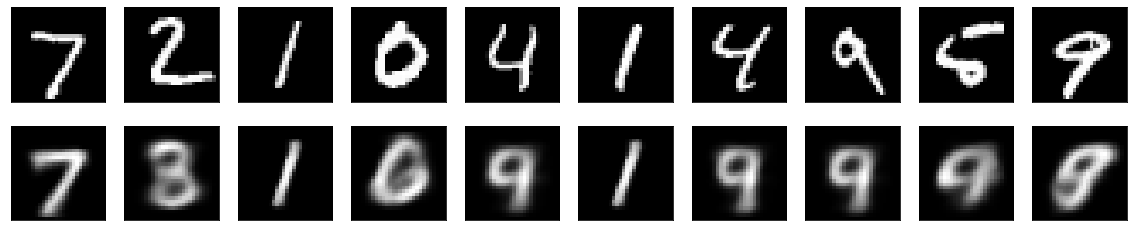

In [29]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Modelo 3: Aumentando o número de neurônios

In [30]:

model3 = tf.keras.models.Sequential([

  tf.keras.layers.Dense(100, activation='relu'),
     

  tf.keras.layers.Dense(2, activation='relu'),  # encoder


  tf.keras.layers.Dense(100, activation='relu'),
         
  tf.keras.layers.Dense(28*28, activation='sigmoid') # decoder
])


In [31]:

# compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy')

# fit the model on training data
history3 = model3.fit(x_train_vec, x_train_vec, epochs=200, batch_size= 150, validation_split = 1/6)



Epoch 1/200
200/200 [==============================] - 3s 15ms/step - loss: 0.2897 - val_loss: 0.2395
Epoch 2/200
200/200 [==============================] - 3s 15ms/step - loss: 0.2354 - val_loss: 0.2261
Epoch 3/200
200/200 [==============================] - 3s 17ms/step - loss: 0.2251 - val_loss: 0.2194
Epoch 4/200
200/200 [==============================] - 4s 18ms/step - loss: 0.2192 - val_loss: 0.2150
Epoch 5/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2154 - val_loss: 0.2120
Epoch 6/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2128 - val_loss: 0.2098
Epoch 7/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2107 - val_loss: 0.2082
Epoch 8/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2090 - val_loss: 0.2066
Epoch 9/200
200/200 [==============================] - 3s 14ms/step - loss: 0.2075 - val_loss: 0.2054
Epoch 10/200
200/200 [==============================] - 3s 14ms/step - loss: 0.206

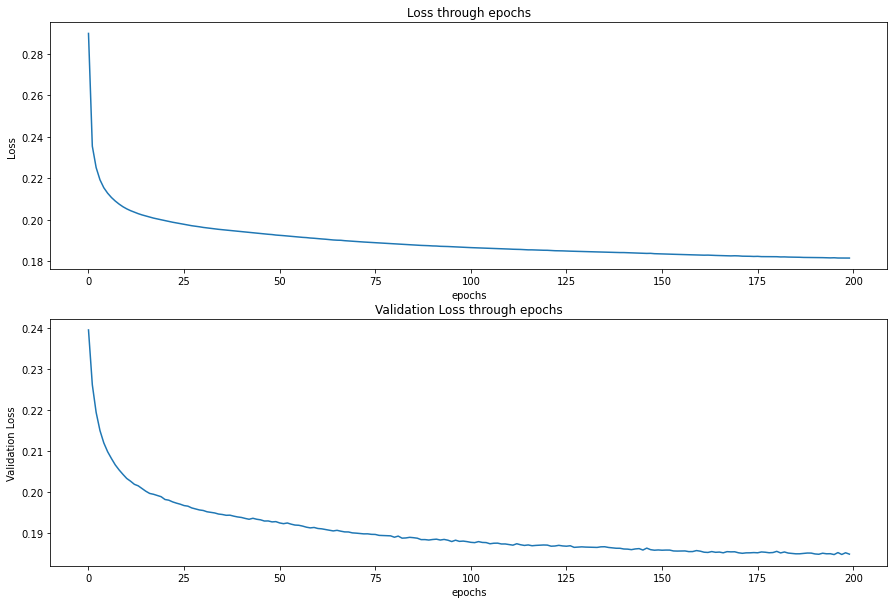

In [32]:
fig, axs = plt.subplots(2,1, figsize=(15,10))

data = ['loss', 'val_loss']
titles = ['Loss through epochs', 'Validation Loss through epochs']
ylabels = ['Loss', 'Validation Loss']

for i in range(2):
  axs[i].plot(history3.history[data[i]])
  axs[i].set_title(titles[i])
  axs[i].set_xlabel('epochs')
  axs[i].set_ylabel(ylabels[i])

plt.show()

In [33]:

# get a summary information about the model 
model3.summary()

# reconstruct the test images
decoded_images3 = model3.predict(x_test_vec)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (250, 100)                78500     
                                                                 
 dense_21 (Dense)            (250, 2)                  202       
                                                                 
 dense_22 (Dense)            (250, 100)                300       
                                                                 
 dense_23 (Dense)            (250, 784)                79184     
                                                                 
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


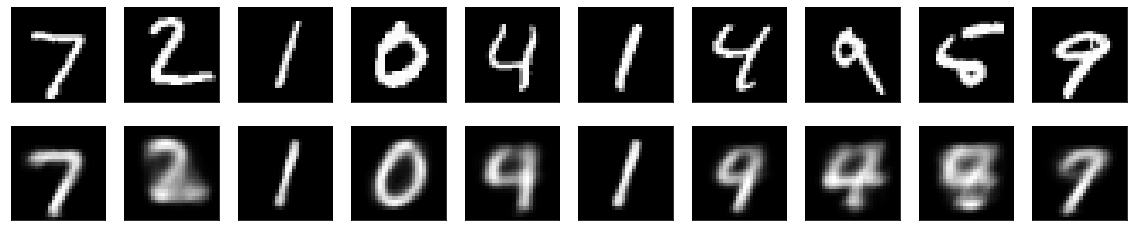

In [34]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Modelo 4: aumentando as camadas e os neurônios

In [35]:

model4 = tf.keras.models.Sequential([

  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),

  tf.keras.layers.Dense(2, activation='relu'),  # encoder

  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
         
  tf.keras.layers.Dense(28*28, activation='sigmoid') # decoder
])


In [36]:

# compile the model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy')

# fit the model on training data
history4 = model4.fit(x_train_vec, x_train_vec, epochs=200, batch_size= 150, validation_split = 1/6)



Epoch 1/200
200/200 [==============================] - 4s 18ms/step - loss: 0.2891 - val_loss: 0.2350
Epoch 2/200
200/200 [==============================] - 3s 17ms/step - loss: 0.2265 - val_loss: 0.2136
Epoch 3/200
200/200 [==============================] - 3s 16ms/step - loss: 0.2085 - val_loss: 0.2032
Epoch 4/200
200/200 [==============================] - 3s 16ms/step - loss: 0.2028 - val_loss: 0.1995
Epoch 5/200
200/200 [==============================] - 3s 16ms/step - loss: 0.1988 - val_loss: 0.1955
Epoch 6/200
200/200 [==============================] - 3s 16ms/step - loss: 0.1948 - val_loss: 0.1917
Epoch 7/200
200/200 [==============================] - 3s 16ms/step - loss: 0.1917 - val_loss: 0.1893
Epoch 8/200
200/200 [==============================] - 3s 17ms/step - loss: 0.1893 - val_loss: 0.1867
Epoch 9/200
200/200 [==============================] - 3s 17ms/step - loss: 0.1875 - val_loss: 0.1855
Epoch 10/200
200/200 [==============================] - 3s 17ms/step - loss: 0.186

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(15,10))

data = ['loss', 'val_loss']
titles = ['Loss through epochs', 'Validation Loss through epochs']

ylabels = ['Loss', 'Validation Loss']

for i in range(2):
  axs[i].plot(history4.history[data[i]])
  axs[i].set_title(titles[i])
  axs[i].set_xlabel('epochs')
  axs[i].set_ylabel(ylabels[i])

plt.show()

In [39]:

# get a summary information about the model 
model4.summary()

# reconstruct the test images
decoded_images4 = model4.predict(x_test_vec)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (250, 100)                78500     
                                                                 
 dense_25 (Dense)            (250, 100)                10100     
                                                                 
 dense_26 (Dense)            (250, 100)                10100     
                                                                 
 dense_27 (Dense)            (250, 2)                  202       
                                                                 
 dense_28 (Dense)            (250, 100)                300       
                                                                 
 dense_29 (Dense)            (250, 100)                10100     
                                                                 
 dense_30 (Dense)            (250, 100)               

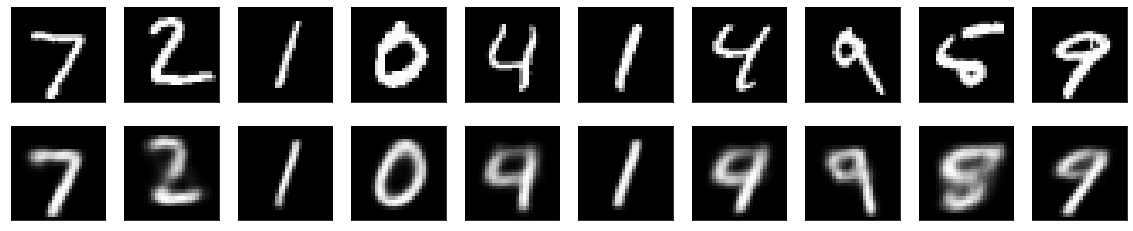

In [40]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images4[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Modelo 5: aumentando ainda mais as camadas e os neurônios

In [41]:

model5 = tf.keras.models.Sequential([
  
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),

  tf.keras.layers.Dense(2, activation='relu'),  # encoder

  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
         
  tf.keras.layers.Dense(28*28, activation='sigmoid') # decoder
])


In [42]:

# compile the model
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy')

# fit the model on training data
history5 = model5.fit(x_train_vec, x_train_vec, epochs=200, batch_size= 150, validation_split = 1/6)



Epoch 1/200
200/200 [==============================] - 8s 34ms/step - loss: 0.2811 - val_loss: 0.2477
Epoch 2/200
200/200 [==============================] - 7s 33ms/step - loss: 0.2428 - val_loss: 0.2336
Epoch 3/200
200/200 [==============================] - 7s 33ms/step - loss: 0.2313 - val_loss: 0.2259
Epoch 4/200
200/200 [==============================] - 7s 33ms/step - loss: 0.2250 - val_loss: 0.2200
Epoch 5/200
200/200 [==============================] - 7s 33ms/step - loss: 0.2193 - val_loss: 0.2130
Epoch 6/200
200/200 [==============================] - 7s 33ms/step - loss: 0.2127 - val_loss: 0.2039
Epoch 7/200
200/200 [==============================] - 8s 39ms/step - loss: 0.1988 - val_loss: 0.1933
Epoch 8/200
200/200 [==============================] - 7s 33ms/step - loss: 0.1931 - val_loss: 0.1904
Epoch 9/200
200/200 [==============================] - 7s 33ms/step - loss: 0.1886 - val_loss: 0.1846
Epoch 10/200
200/200 [==============================] - 7s 33ms/step - loss: 0.186

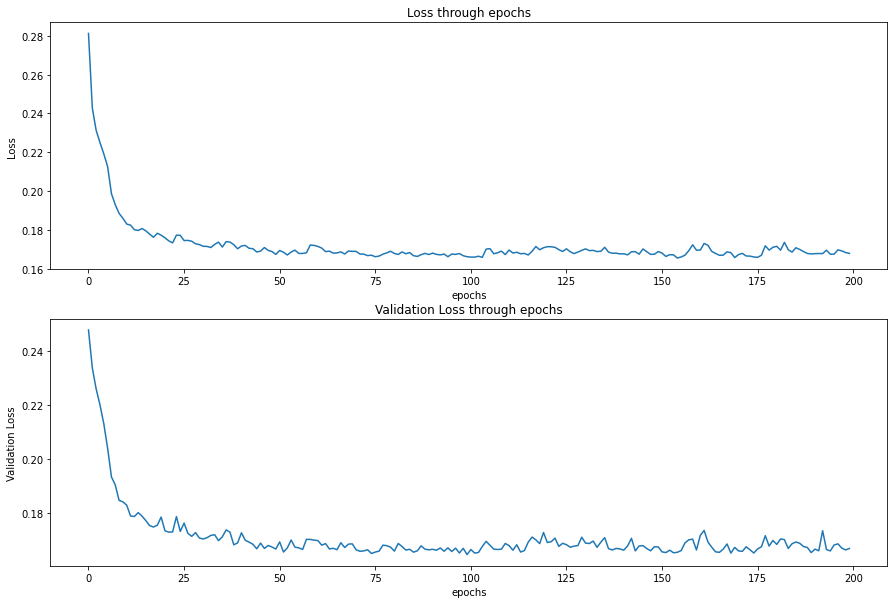

In [43]:
fig, axs = plt.subplots(2,1, figsize=(15,10))

data = ['loss', 'val_loss']
titles = ['Loss through epochs', 'Validation Loss through epochs']
ylabels = ['Loss', 'Validation Loss']

for i in range(2):
  axs[i].plot(history5.history[data[i]])
  axs[i].set_title(titles[i])
  axs[i].set_xlabel('epochs')
  axs[i].set_ylabel(ylabels[i])

plt.show()

In [44]:

# get a summary information about the model 
model5.summary()

# reconstruct the test images
decoded_images5 = model5.predict(x_test_vec)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (250, 200)                157000    
                                                                 
 dense_33 (Dense)            (250, 200)                40200     
                                                                 
 dense_34 (Dense)            (250, 200)                40200     
                                                                 
 dense_35 (Dense)            (250, 200)                40200     
                                                                 
 dense_36 (Dense)            (250, 200)                40200     
                                                                 
 dense_37 (Dense)            (250, 2)                  402       
                                                                 
 dense_38 (Dense)            (250, 200)               

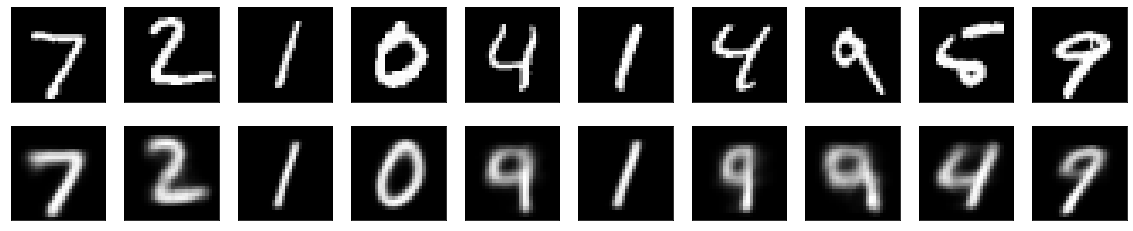

In [45]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images5[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Comparação entre os modelos

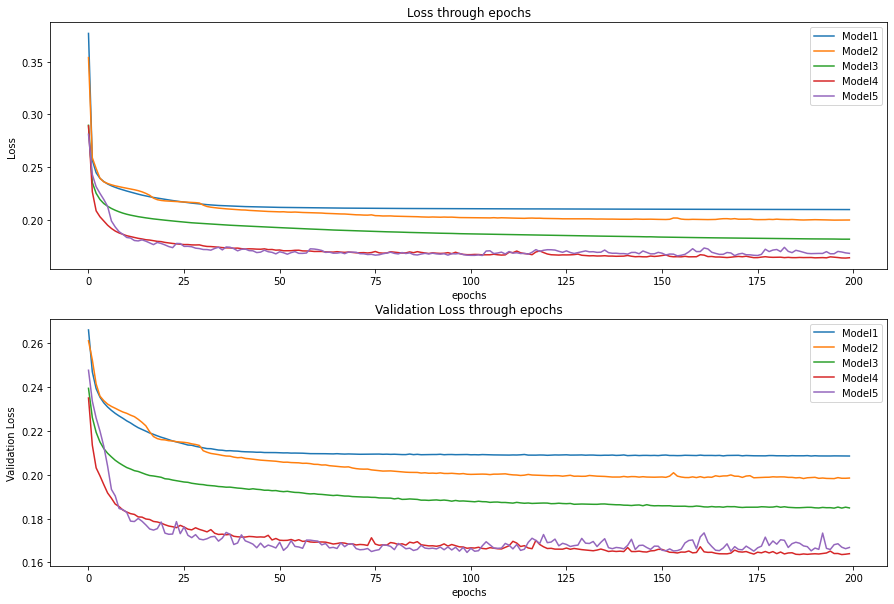

In [51]:
fig, axs = plt.subplots(2,1, figsize=(15,10))

data = ['loss', 'val_loss']
titles = ['Loss through epochs', 'Validation Loss through epochs']
labels = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5']
ylabels = ['Loss', 'Validation Loss']

for i in range(2):
  axs[i].plot(history1.history[data[i]], label = labels[0])
  axs[i].plot(history2.history[data[i]], label = labels[1])
  axs[i].plot(history3.history[data[i]], label = labels[2])
  axs[i].plot(history4.history[data[i]], label = labels[3])
  axs[i].plot(history5.history[data[i]], label = labels[4])
  axs[i].set_title(titles[i])
  axs[i].set_xlabel('epochs')
  axs[i].set_ylabel(ylabels[i])
  axs[i].legend()

plt.show()

O modelo 4 apresenta o menor erro após o treino, logo deve ser o modelo que reconstroi a imagem de maneira mais satisfatória.

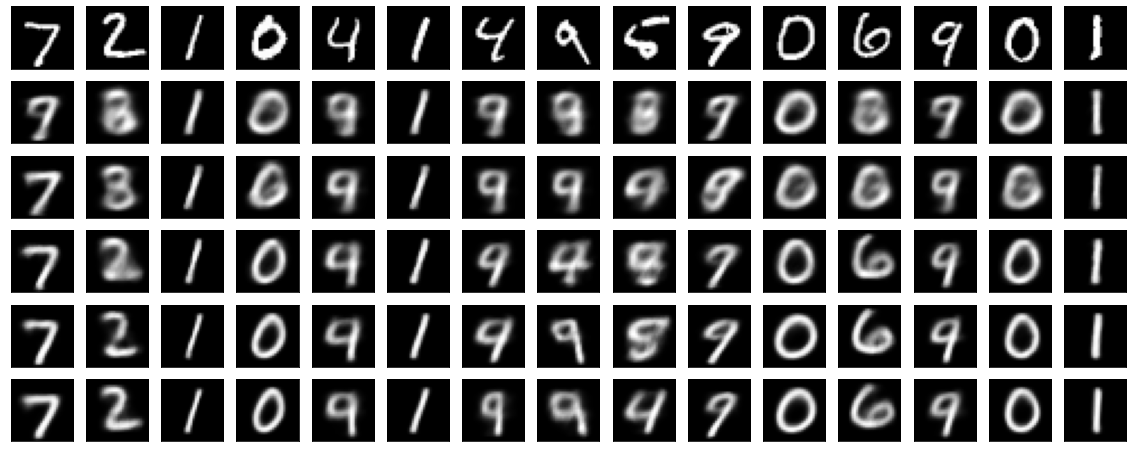

In [52]:
# Use Matplotlib
import matplotlib.pyplot as plt
shift = 0
n = 15  # How many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # Display original
    ax = plt.subplot(6, n, i + 1)
    plt.imshow(x_test[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(6, n, i + 1 + n)
    plt.imshow(decoded_images1[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(6, n, i + 1 + 2*n)
    plt.imshow(decoded_images2[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(6, n, i + 1 + 3*n)
    plt.imshow(decoded_images3[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(6, n, i + 1 + 4*n)
    plt.imshow(decoded_images4[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(6, n, i + 1 + 5*n)
    plt.imshow(decoded_images5[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Aparentemente, como mostrado em algumas imagens de teste acima, o modelo 4 realmente aparenta ser o modelo que reconstroi as imagens de maneira mais satisfatória.

O modelo 5, em geral, também reconstroi imagens satisfatórias mas em algumas ele erra bastante.

# Modelo com encoded de dimensão 16

In [53]:
model_4x4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  tf.keras.layers.Dense(4*4, activation='relu'),      # encoder
  
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(28*28, activation='sigmoid') # decoder
])


In [54]:
# compile the model
model_4x4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy')

# fit the model on training data
history_4x4 = model_4x4.fit(x_train_vec, x_train_vec, epochs=100, batch_size= 150, validation_split = 1/6)

Epoch 1/100
200/200 [==============================] - 7s 29ms/step - loss: 0.2814 - val_loss: 0.2477
Epoch 2/100
200/200 [==============================] - 5s 26ms/step - loss: 0.2184 - val_loss: 0.1974
Epoch 3/100
200/200 [==============================] - 5s 26ms/step - loss: 0.1903 - val_loss: 0.1822
Epoch 4/100
200/200 [==============================] - 5s 26ms/step - loss: 0.1773 - val_loss: 0.1704
Epoch 5/100
200/200 [==============================] - 5s 26ms/step - loss: 0.1687 - val_loss: 0.1645
Epoch 6/100
200/200 [==============================] - 5s 25ms/step - loss: 0.1632 - val_loss: 0.1594
Epoch 7/100
200/200 [==============================] - 5s 26ms/step - loss: 0.1564 - val_loss: 0.1535
Epoch 8/100
200/200 [==============================] - 5s 25ms/step - loss: 0.1507 - val_loss: 0.1489
Epoch 9/100
200/200 [==============================] - 5s 26ms/step - loss: 0.1477 - val_loss: 0.1464
Epoch 10/100
200/200 [==============================] - 5s 26ms/step - loss: 0.145

In [55]:
# get a summary information about the model 
model_4x4.summary()

# reconstruct the test images
decoded_images_4x4 = model_4x4.predict(x_test_vec)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (250, 256)                200960    
                                                                 
 dense_59 (Dense)            (250, 128)                32896     
                                                                 
 dense_60 (Dense)            (250, 64)                 8256      
                                                                 
 dense_61 (Dense)            (250, 32)                 2080      
                                                                 
 dense_62 (Dense)            (250, 16)                 528       
                                                                 
 dense_63 (Dense)            (250, 16)                 272       
                                                                 
 dense_64 (Dense)            (250, 16)                

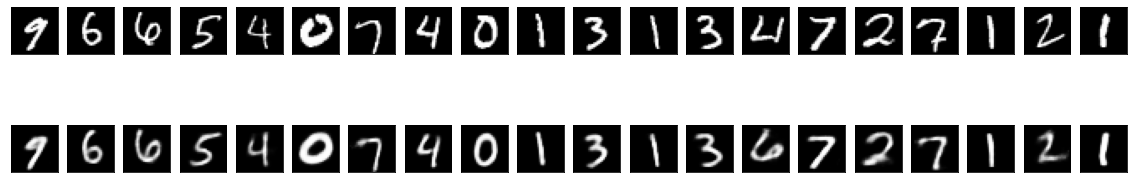

In [56]:
# Use Matplotlib
import matplotlib.pyplot as plt
shift = 0
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images_4x4[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [57]:

# We will need to access the contents of the intermediate layer.
# That requires defining a new keras model that gets the output of the encoder
# layer

# First, we will need the names of each layer
print(model_4x4.layers[4].name)

# To be more meaningful, we will change those names as follows
model_4x4.layers[4]._name = "encoded"

print(model_4x4.layers[4].name)

# now we create a new keras model based on model1 defined (and trained) previously
encoder_4x4 = tf.keras.models.Model( inputs = model_4x4.input,
                                 outputs = model_4x4.get_layer("encoded").output )
encoded_images_4x4 = encoder_4x4.predict(x_test_vec)


dense_62
encoded


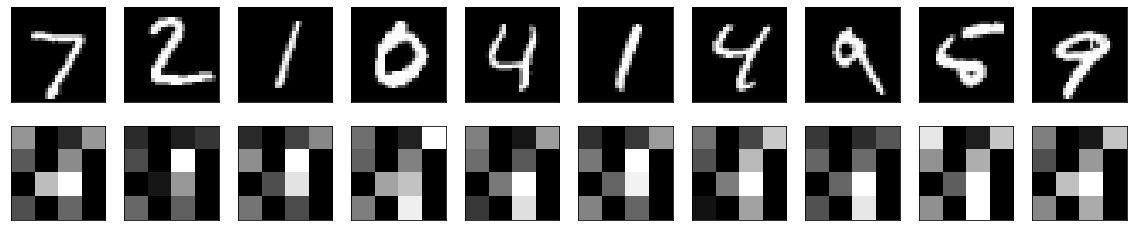

In [58]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images_4x4[i].reshape(4, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# t-SNE

In [20]:
from sklearn.manifold import TSNE


data_1000 = x_test_vec
labels_1000 = y_test


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(x_test_vec)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_test)).T

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [21]:
label = []
x = []
y = []
for point in tsne_data:
  x.append(point[0])
  y.append(point[1])
  if point[2] == 0:
    label.append('0')
  elif point[2] == 1:
    label.append('1')
  elif point[2] == 2:
    label.append('2')
  elif point[2] == 3:
    label.append('3')
  elif point[2] == 4:
    label.append('4')
  elif point[2] == 5:
    label.append('5')
  elif point[2] == 6:
    label.append('6') 
  elif point[2] == 7:
    label.append('7')                   
  elif point[2] == 8:
    label.append('8')    
  elif point[2] == 9:
    label.append('9')
  
      

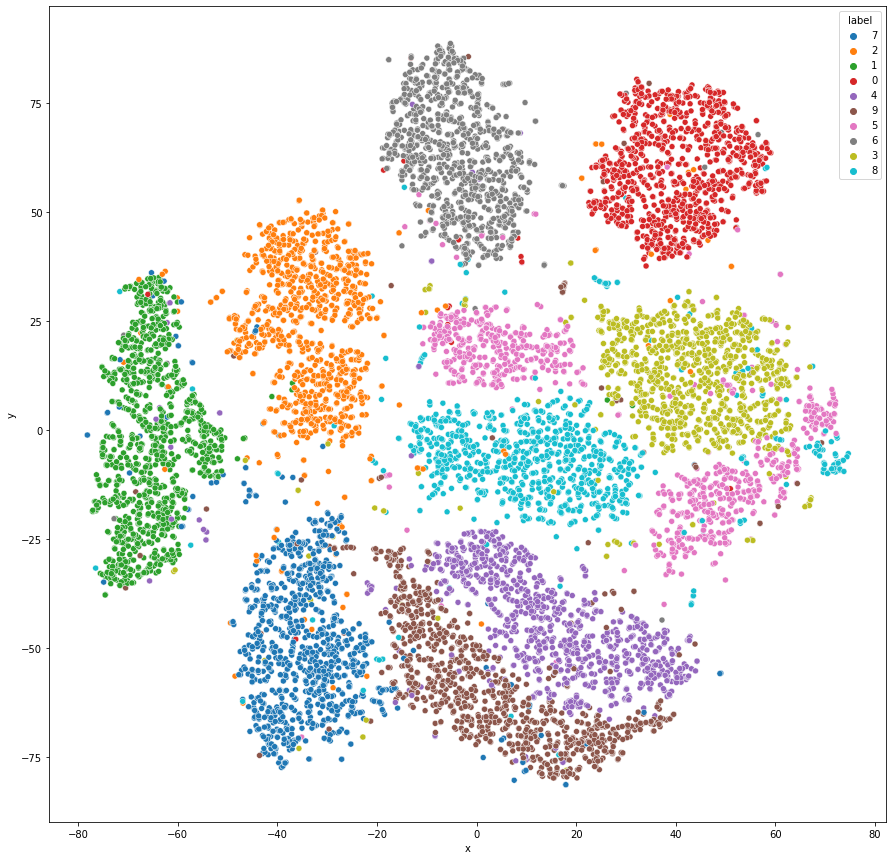

In [22]:
import seaborn as sns

fig = plt.figure(figsize = (15,15))
df = pd.DataFrame(dict(x=tsne_data[:,0], y=tsne_data[:,1], label=label))
sns.scatterplot(x='x', y='y', data=df, hue='label')

plt.show()

O modelo tSNE produz um resultado bem satisfatório ao fazer a redução de dimensionalidade.


# Model 2 with classification

In [23]:

def get_model():

    # begining of the encoder part
    input_img = tf.keras.layers.Input(28*28)
    encoded_1 = tf.keras.layers.Dense(100, activation='relu')(input_img)
    encoded_2 = tf.keras.layers.Dense(100, activation='relu')(encoded_1)
    encoded_3 = tf.keras.layers.Dense(100, activation='relu')(encoded_2)
 

    # encoded image
    middle = tf.keras.layers.Dense(2, activation='sigmoid', name = "middle")(encoded_3)

    # decoder
    decoded_1 = tf.keras.layers.Dense(100, activation='relu')(middle)
    decoded_2 = tf.keras.layers.Dense(100, activation='relu')(decoded_1)
    decoded_3 = tf.keras.layers.Dense(100, activation='relu')(decoded_2)


    decoded_image = tf.keras.layers.Dense(28*28, activation='sigmoid', name="reconstructed_image")(decoded_3)

    # classifier
    classified_1 = tf.keras.layers.Dense(60, activation = 'relu')(middle)
    classified_2 = tf.keras.layers.Dense(60, activation = 'relu')(classified_1)
    label_image = tf.keras.layers.Dense(10, activation = 'softmax', name = "predicted_class")(classified_2)

    # define the classification autoencoder as keras.Model()
    model = tf.keras.Model(inputs = [input_img], 
                           outputs = [decoded_image, label_image] )


    # compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss=['binary_crossentropy', "sparse_categorical_crossentropy"],
                loss_weights = [0.5, 0.5],
                metrics=["accuracy"] )
    
    return model


model_classification = get_model()

model_classification.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          78500       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 100)          10100       ['dense_1[0][0]']                
                                                                                              

In [24]:
# fit the model on training data
model_classification.fit(x_train_vec, 
                        [x_train_vec, y_train], 
                        epochs=200, 
                        batch_size= 150, 
                        validation_split = 1/6)


Epoch 1/200
334/334 [==============================] - 6s 16ms/step - loss: 0.8567 - reconstructed_image_loss: 0.2961 - predicted_class_loss: 1.4174 - reconstructed_image_accuracy: 0.0139 - predicted_class_accuracy: 0.4518 - val_loss: 0.5325 - val_reconstructed_image_loss: 0.2416 - val_predicted_class_loss: 0.8233 - val_reconstructed_image_accuracy: 0.0077 - val_predicted_class_accuracy: 0.7162
Epoch 2/200
334/334 [==============================] - 5s 15ms/step - loss: 0.3929 - reconstructed_image_loss: 0.2375 - predicted_class_loss: 0.5483 - reconstructed_image_accuracy: 0.0099 - predicted_class_accuracy: 0.8471 - val_loss: 0.2892 - val_reconstructed_image_loss: 0.2261 - val_predicted_class_loss: 0.3522 - val_reconstructed_image_accuracy: 0.0100 - val_predicted_class_accuracy: 0.9275
Epoch 3/200
334/334 [==============================] - 5s 15ms/step - loss: 0.2528 - reconstructed_image_loss: 0.2254 - predicted_class_loss: 0.2801 - reconstructed_image_accuracy: 0.0106 - predicted_clas

In [32]:
# We will need to access the contents of the intermediate layer.
# That requires defining a new keras model that gets the output of the encoder
# layer

# First, we will need the names of each layer
print(model_classification.layers[4].name)
print(model_classification.layers[10].name)
print(model_classification.layers[11].name)

# To be more meaningful, we will change those names as follows
model_classification.layers[4]._name = "encoded"
model_classification.layers[10]._name = "decoded"
model_classification.layers[11]._name = "classifier"

print(model_classification.layers[4].name)
print(model_classification.layers[10].name)
print(model_classification.layers[11].name)


# now we create a new keras model based on model defined (and trained) previously
encoder_classification = tf.keras.models.Model( inputs = model_classification.input,
                                 outputs = model_classification.get_layer("encoded").output)

decoded_classification = tf.keras.models.Model( inputs = model_classification.input,
                                 outputs = model_classification.get_layer("decoded").output)

encoded_images_classification = encoder_classification.predict(x_test_vec)
decoded_images_classification = decoded_classification.predict(x_test_vec)


encoder
decoder
classifier
encoded
decoded
classifier


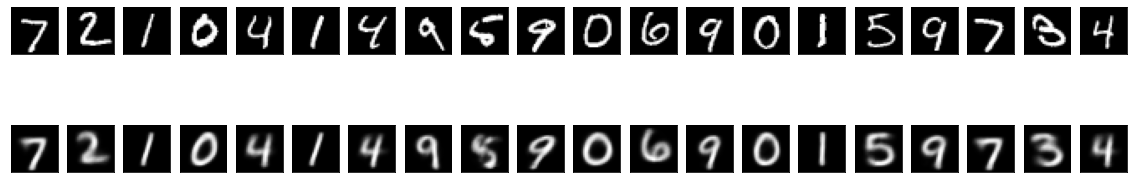

In [33]:
# Use Matplotlib
import matplotlib.pyplot as plt

shift = 0
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images_classification[i+shift].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

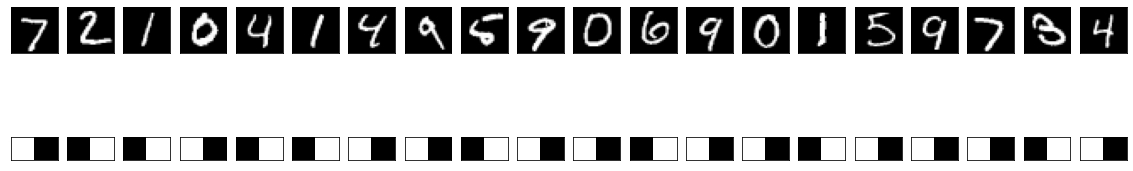

In [34]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images_classification[i].reshape(1, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [35]:
labels = []
x = []
y = []
for i in range(10000):
  x.append(encoded_images_classification[i][0])
  y.append(encoded_images_classification[i][1])
  if y_test[i] == 0:
    labels.append('0')
  elif y_test[i] == 1:
    labels.append('1')
  elif y_test[i] == 2:
    labels.append('2')
  elif y_test[i] == 3:
    labels.append('3')
  elif y_test[i] == 4:
    labels.append('4')
  elif y_test[i] == 5:
    labels.append('5')
  elif y_test[i] == 6:
    labels.append('6') 
  elif y_test[i] == 7:
    labels.append('7')                   
  elif y_test[i] == 8:
    labels.append('8')    
  elif y_test[i] == 9:
    labels.append('9')
  

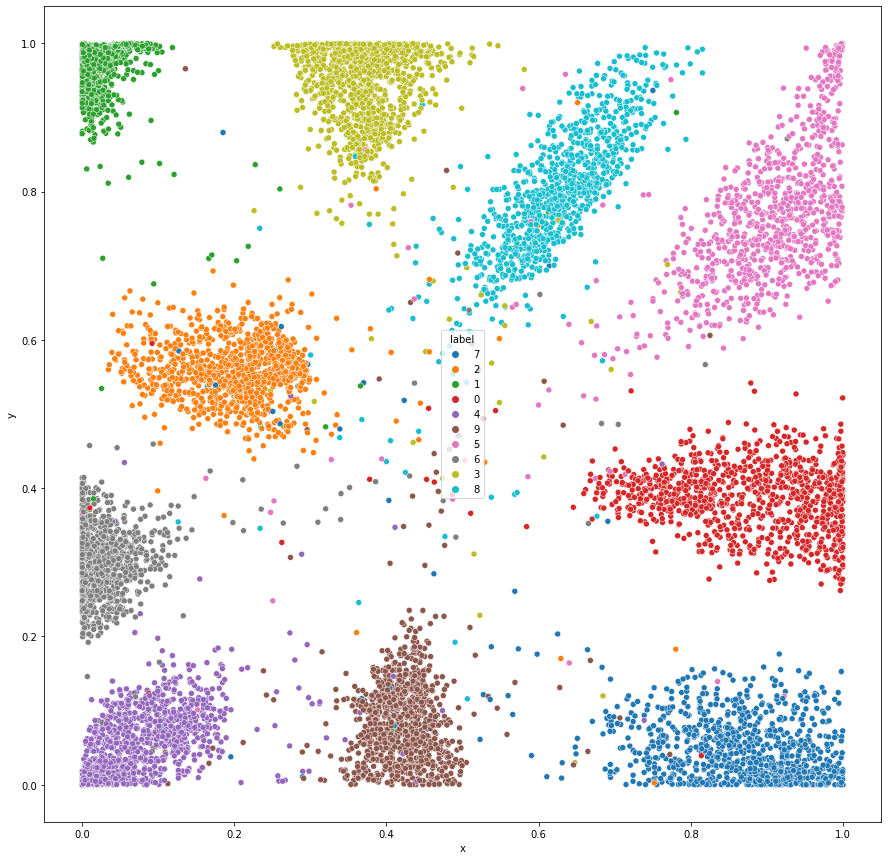

In [29]:
fig = plt.figure(figsize = (15,15))
df = pd.DataFrame(dict(x=encoded_images_classification[:,0], y=encoded_images_classification[:,1], label=labels))
sns.scatterplot(x='x', y='y', data=df, hue='label')

plt.show()

Aparentemente o modelo de redes neurais com classificação faz uma separação bem mais clara que o tSNE

# Tentando produzir novas imagens

Uma forma de produzir novas imagens é escolher pontos no conjunto $[0,1] \times [0,1]$ e passar na rede, já treinada, pela parte de decodificar.

Alguns exemplos de imagens criadas aleatoriamente:

In [ ]:
decoder_classification = tf.keras.models.Model( inputs = model_classification.get_layer("encoded").output,
                                 outputs = model_classification.get_layer("decoded").output)

[0.8274431262893109, 0.15741168719291687]
[0.10480540167601882, 0.4694988922565989]
[0.4635923616178863, 0.3692569299731684]
[0.6590096668411501, 0.3223471826786516]
[0.36017546798742806, 0.4977847229303827]
[0.2323805187665814, 0.9893637049169326]
[0.5264055084914491, 0.8879747570600957]
[0.4473926297058124, 0.43312505344527175]
[0.9097069275942472, 0.40843066590987953]
[0.3368768682806764, 0.7431317957342519]
[0.7971128485890118, 0.20831043324936782]
[0.6311479140704027, 0.9662416971306794]
[0.8573711972193206, 0.11437656797923423]
[0.6558528243388275, 0.9704270430722047]
[0.6191314653295088, 0.7594623804812002]
[0.49391297041276505, 0.5258638663156688]
[0.25134485492676417, 0.6329782691839138]
[0.5247005095468268, 0.36011674269433613]
[0.33674437818904424, 0.4298753723886355]
[0.8453103196139163, 0.7330254469863169]


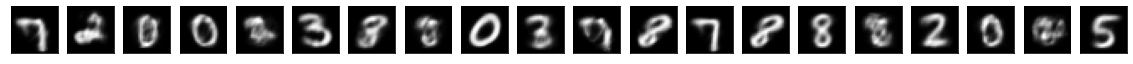

In [82]:
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))

images = []
for i in range(n):
    x = np.random.rand()
    y = np.random.rand()
    random_image = decoder_classification.predict(np.array([[x,y]])).reshape(28,28)
    # Display Random Image
    print([x,y])
    images.append([x,y])
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(random_image)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
images = np.array(images)
plt.show()

Podemos ver pelas imagens e no gráfico abaixo(onde adicionamos as imagens criadas) que as imagens criadas fazem sentido e as que são uma mistura de dois ou mais digitos se localizam, geralmente, na fronteira entre dois clusters.

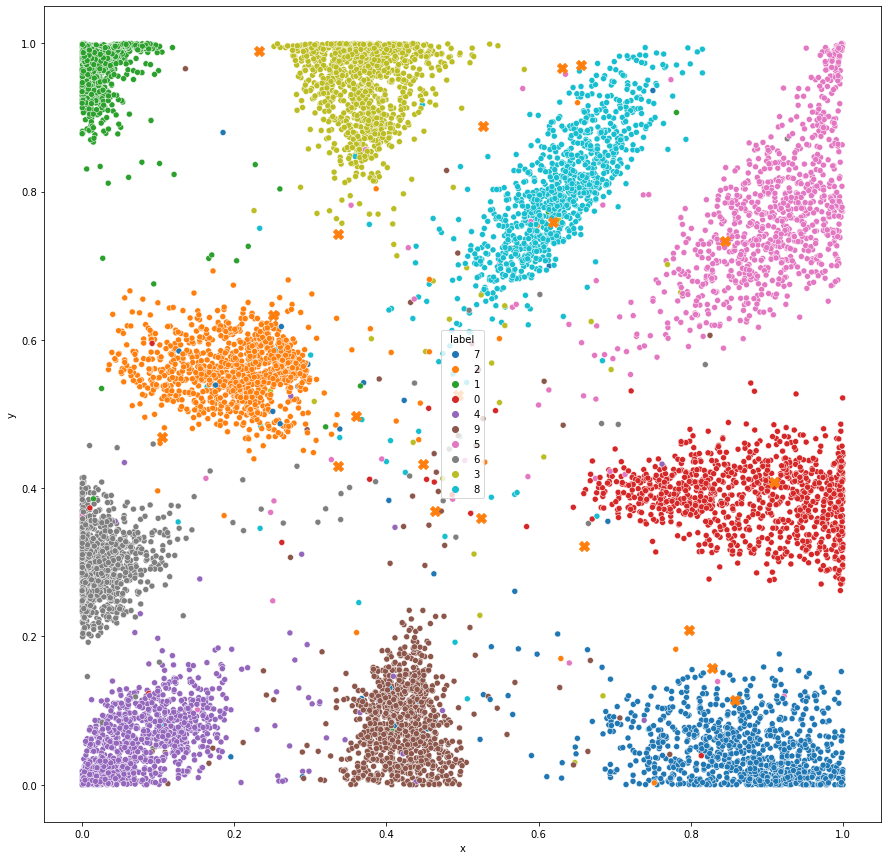

In [83]:
fig = plt.figure(figsize = (15,15))
df = pd.DataFrame(dict(x=encoded_images_classification[:,0], y=encoded_images_classification[:,1], label=labels))
sns.scatterplot(x='x', y='y', data=df, hue='label')
plt.scatter(images[:,0], images[:,1], marker='X', s=100)

plt.show()